# Analyze the sales of the company in order to target new areas of growth

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics
from scipy import stats
from scipy.stats import chi2_contingency
from datetime import datetime

In [2]:
# Load Transaction Data
transactions = pd.read_csv('transactions.csv')
print(transactions)

       id_prod                        date session_id client_id
0       0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450
1        2_226  2022-02-03 01:55:53.276402   s_159142     c_277
2        1_374  2021-09-23 15:13:46.938559    s_94290    c_4270
3       0_2186  2021-10-17 03:27:18.783634   s_105936    c_4597
4       0_1351  2021-07-17 20:34:25.800563    s_63642    c_1242
...        ...                         ...        ...       ...
337011   1_671  2021-05-28 12:35:46.214839    s_40720    c_3454
337012   0_759  2021-06-19 00:19:23.917703    s_50568    c_6268
337013  0_1256  2021-03-16 17:31:59.442007     s_7219    c_4137
337014   2_227  2021-10-30 16:50:15.997750   s_112349       c_5
337015  0_1417  2021-06-26 14:38:19.732946    s_54117    c_6714

[337016 rows x 4 columns]


In [3]:
# check to clean for bad data
transactions.describe()

,id_prod,date,session_id,client_id
count,337016,337016,337016,337016
unique,3266,336855,169195,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,1081,13,200,12855


In [4]:
# Replace bad data (date starting with test)
mask = transactions['date'].str.startswith('test_')
transactions.loc[mask, 'date'] = transactions.loc[mask, 'date'].str.replace('test_', '')
print(mask)

0         False
1         False
2         False
3         False
4         False
          ...  
337011    False
337012    False
337013    False
337014    False
337015    False
Name: date, Length: 337016, dtype: bool


In [5]:
# check again to clean for bad data
transactions.describe()

,id_prod,date,session_id,client_id
count,337016,337016,337016,337016
unique,3266,336855,169195,8602
top,1_369,2021-03-01 02:30:02.237413,s_0,c_1609
freq,1081,13,200,12855


In [6]:
# Check for missing values in data
transactions.isnull().sum().sum()

0

In [7]:
# Check missing by variable
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [9]:
# load Product Data
products = pd.read_csv('products.csv')
print(products)

     id_prod   price  categ
0     0_1421   19.99      0
1     0_1368    5.13      0
2      0_731   17.99      0
3      1_587    4.99      1
4     0_1507    3.99      0
...      ...     ...    ...
3282    2_23  115.99      2
3283   0_146   17.14      0
3284   0_802   11.22      0
3285   1_140   38.56      1
3286  0_1920   25.16      0

[3287 rows x 3 columns]


In [10]:
# check to clean for bad data
products.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [11]:
# Remove negative 'price' values
cleaned_products = products[products['price'] >= 0]
print(cleaned_products)

     id_prod   price  categ
0     0_1421   19.99      0
1     0_1368    5.13      0
2      0_731   17.99      0
3      1_587    4.99      1
4     0_1507    3.99      0
...      ...     ...    ...
3282    2_23  115.99      2
3283   0_146   17.14      0
3284   0_802   11.22      0
3285   1_140   38.56      1
3286  0_1920   25.16      0

[3286 rows x 3 columns]


In [12]:
# check to clean for bad data
cleaned_products.describe()

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [13]:
# Check missing by variable
products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [14]:
# Perform regular/inner join instead to only bring data that exists in both tables
d1 = transactions.merge(cleaned_products, left_on = 'id_prod', right_on ='id_prod')
print(d1)

       id_prod                        date session_id client_id   price  categ
0       0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450    4.99      0
1       0_1483  2021-10-18 19:16:14.767807   s_106741    c_1576    4.99      0
2       0_1483  2021-11-14 11:11:45.276771   s_119491     c_182    4.99      0
3       0_1483  2021-07-30 19:37:16.087057    s_69222    c_1196    4.99      0
4       0_1483  2021-03-30 14:18:13.403218    s_13545    c_2890    4.99      0
...        ...                         ...        ...       ...     ...    ...
336708  0_1683  2021-12-24 04:37:46.407713   s_139091    c_5508    2.99      0
336709    2_98  2021-03-08 21:10:32.250919     s_3637    c_5967  149.74      2
336710   0_833  2021-09-27 23:22:40.394509    s_96558    c_8260    2.99      0
336711  0_1284  2021-04-14 13:13:06.560397    s_20477    c_1551    1.38      0
336712  0_1116  2021-07-27 04:02:53.408409    s_67633    c_3291    2.97      0

[336713 rows x 6 columns]


In [15]:
# check to clean for bad data
d1.describe()

,price,categ
count,336713.000000,336713.000000
mean,17.215189,0.430156
std,17.855445,0.591082
min,0.620000,0.000000
25%,8.610000,0.000000
50%,13.900000,0.000000
75%,18.990000,1.000000
max,300.000000,2.000000


In [16]:
# Check missing by variable
d1.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
dtype: int64

In [17]:
# Load Customer Data
customers = pd.read_csv('customers.csv')
print(customers)

     client_id sex  birth
0       c_4410   f   1967
1       c_7839   f   1975
2       c_1699   f   1984
3       c_5961   f   1962
4       c_5320   m   1943
...        ...  ..    ...
8618    c_7920   m   1956
8619    c_7403   f   1970
8620    c_5119   m   1974
8621    c_5643   f   1968
8622      c_84   f   1982

[8623 rows x 3 columns]


In [18]:
# check to clean for bad data
customers.describe()

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [20]:
# Check missing by variable
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [21]:
df = d1.merge(customers, left_on = 'client_id', right_on ='client_id')
print(df)

       id_prod                        date session_id client_id  price  categ  \
0       0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450   4.99      0   
1       0_1085  2021-09-29 11:14:59.793823    s_97382    c_4450   3.99      0   
2       0_1453  2021-08-27 19:50:46.796939    s_81509    c_4450   7.99      0   
3       0_1405  2021-08-27 20:07:25.878440    s_81509    c_4450   4.99      0   
4       0_1392  2021-12-28 11:45:04.072281   s_141302    c_4450   6.30      0   
...        ...                         ...        ...       ...    ...    ...   
336708   1_607  2021-09-25 07:26:00.224331    s_95185    c_4786  26.99      1   
336709   1_673  2021-06-01 00:49:49.781631    s_42350    c_2793  12.99      1   
336710  0_2075  2021-10-09 09:03:48.268536   s_102200    c_2793   8.99      0   
336711  0_1692  2021-09-15 19:42:08.596375    s_90430    c_4478  13.36      0   
336712   0_142  2021-09-25 18:07:25.880052    s_95415    c_1232  19.85      0   

       sex  birth  
0      

In [22]:
# check to clean for bad data
df.describe()

,price,categ,birth
count,336713.000000,336713.000000,336713.000000
mean,17.215189,0.430156,1977.823568
std,17.855445,0.591082,13.524433
min,0.620000,0.000000,1929.000000
25%,8.610000,0.000000,1971.000000
50%,13.900000,0.000000,1980.000000
75%,18.990000,1.000000,1987.000000
max,300.000000,2.000000,2004.000000


In [23]:
# Check missing by variable
df.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
sex           0
birth         0
dtype: int64

##### Central tendency (Mean, Median, Mode) and Dispersion Measures (Variance and Standard Deviation)

In [24]:
# mean
round(statistics.mean(df['price']),1)

17.2

In [25]:
# median
statistics.median(df['price'])

13.9

In [26]:
# mode
round(statistics.mode(df['price']),1)

16.0

In [27]:
# Variance
round(statistics.variance(df['price']),1)

318.8

In [28]:
# Standart Deviation
round(statistics.stdev(df['price']),1)

17.9

##### Lorenz curve and a Gini coefficient
Is used to measure the variability of the distribution of price. Hence, Lorenz Curve is the measure of the deviation of the actual distribution of a statistical series from the line of equal distribution. The extent of this deviation is known as Lorenz Coefficient.

In [29]:
# Sort values by 'price'
df = d1.merge(customers, left_on = 'client_id', right_on ='client_id')
df = df.sort_values(by=['price'])
print(df)

       id_prod                        date session_id client_id   price  \
177013   0_202  2021-04-08 17:47:18.158963    s_17806    c_3297    0.62   
261154   0_528  2021-05-29 20:46:36.259964    s_41352    c_3757    0.62   
334699   0_528  2021-10-20 05:44:08.973803   s_107417    c_5606    0.62   
287140   0_202  2021-05-14 15:26:20.597059    s_34456    c_5510    0.62   
81444    0_202  2022-01-06 18:57:12.656309   s_145956    c_2069    0.62   
...        ...                         ...        ...       ...     ...   
49844      2_2  2021-12-04 15:45:14.708313   s_129351    c_4958  300.00   
249749     2_2  2021-06-06 23:14:33.815188    s_45088    c_2467  300.00   
181445     2_2  2021-06-12 08:44:00.882917    s_47558    c_5237  300.00   
49842      2_2  2021-03-26 04:33:19.697459    s_11582    c_4958  300.00   
233193     2_2  2021-03-07 14:07:31.004391     s_3041    c_1001  300.00   

        categ sex  birth  
177013      0   f   1975  
261154      0   f   1959  
334699      0   f 

In [30]:
# Calculate the cumulative sum of the sorted data and divide it by the total sum of the data 
df['cumulative_perc'] = df['price'].cumsum() / df['price'].sum() 
print(df)

       id_prod                        date session_id client_id   price  \
177013   0_202  2021-04-08 17:47:18.158963    s_17806    c_3297    0.62   
261154   0_528  2021-05-29 20:46:36.259964    s_41352    c_3757    0.62   
334699   0_528  2021-10-20 05:44:08.973803   s_107417    c_5606    0.62   
287140   0_202  2021-05-14 15:26:20.597059    s_34456    c_5510    0.62   
81444    0_202  2022-01-06 18:57:12.656309   s_145956    c_2069    0.62   
...        ...                         ...        ...       ...     ...   
49844      2_2  2021-12-04 15:45:14.708313   s_129351    c_4958  300.00   
249749     2_2  2021-06-06 23:14:33.815188    s_45088    c_2467  300.00   
181445     2_2  2021-06-12 08:44:00.882917    s_47558    c_5237  300.00   
49842      2_2  2021-03-26 04:33:19.697459    s_11582    c_4958  300.00   
233193     2_2  2021-03-07 14:07:31.004391     s_3041    c_1001  300.00   

        categ sex  birth  cumulative_perc  
177013      0   f   1975     1.069597e-07  
261154     

In [31]:
# Calculate the Gini coefficient 
area_under_curve = df['cumulative_perc'].sum() / len(df) 
area_between_curve_and_diagonal = 0.5 - area_under_curve 
gini_coefficient = area_between_curve_and_diagonal / 0.5
print(f'The Gini coefficient is {gini_coefficient:.2f}')

The Gini coefficient is 0.39


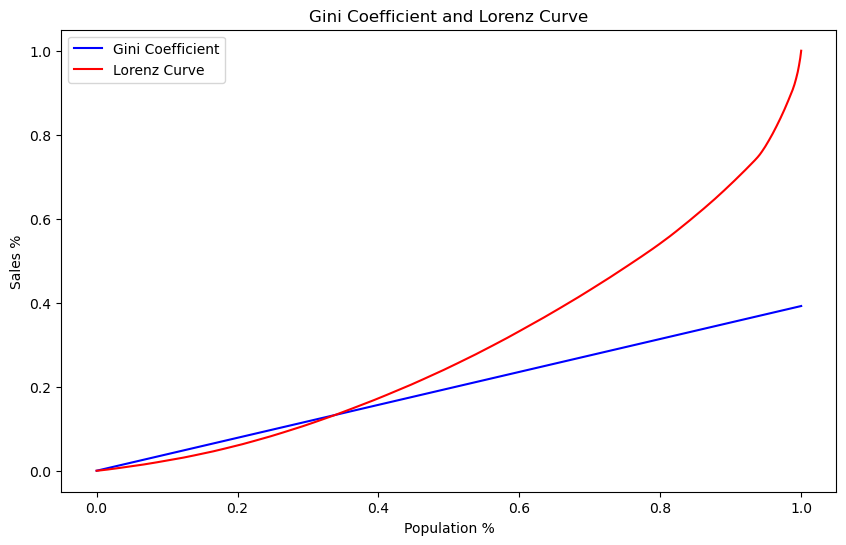

In [32]:
plt.figure(figsize=(10,6))
# Generate x values
x = np.linspace(0, 1, 10)
# Define the line equation with the desired gini_coefficient
y = gini_coefficient * x
# Plot the lines
plt.plot(x, y, label='Gini Coefficient', color='blue') # Gini Coefficient
plt.plot(np.linspace(0, 1, len(df)), df['cumulative_perc'].values, label = 'Lorenz Curve', color = 'red') #Lorenz curve
# Add labels and legend
plt.title('Gini Coefficient and Lorenz Curve')
plt.xlabel('Population %')
plt.ylabel('Sales %')
plt.legend()
# Show the plot
plt.show()

### Conclusion: about 30% of population counts for 15% of the sales


#### Graphic representations, including at least one histogram, a representation with boxplots, and a time series graph (i.e a graph in which the abscissa axis represents dates).

#### Quantitative Data: Price
#### Qualitative Data: Category, Sex, Birth, Age

In [33]:
df = d1.merge(customers, left_on = 'client_id', right_on ='client_id')

#### Histogram 
How many datapoints fall into different ranges

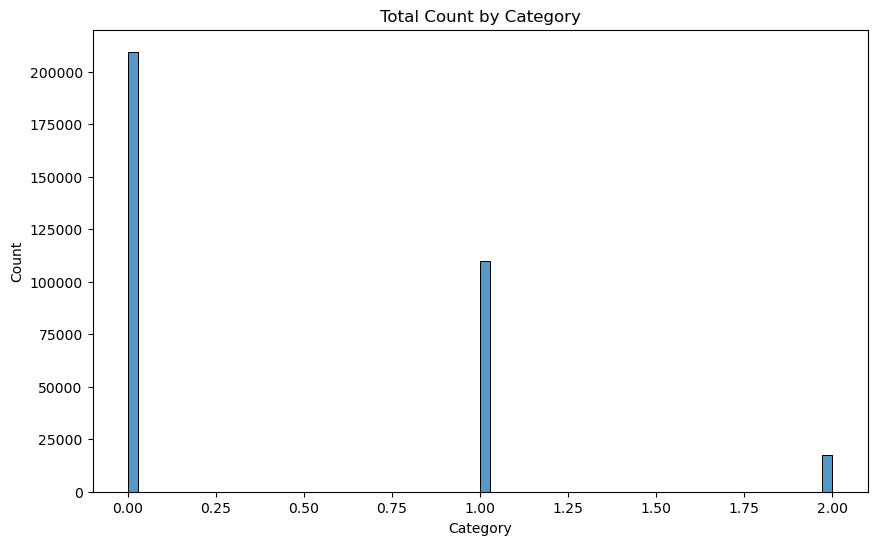

In [34]:
# Histogram by Category
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='categ')
plt.title('Total Count by Category')
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

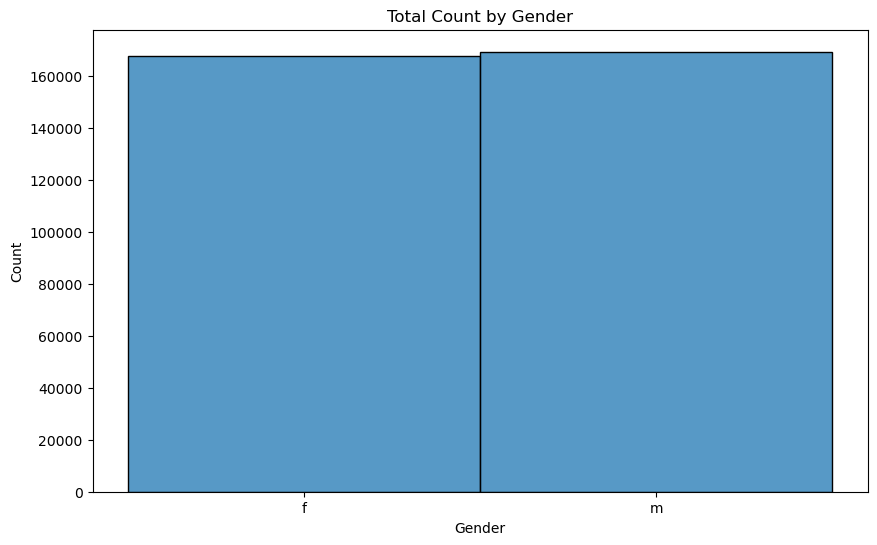

In [35]:
# Histogram by Gender
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='sex')
plt.title('Total Count by Gender')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [36]:
current_year = datetime.now().year
df['age'] = current_year - df['birth']
print(df)

       id_prod                        date session_id client_id  price  categ  \
0       0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450   4.99      0   
1       0_1085  2021-09-29 11:14:59.793823    s_97382    c_4450   3.99      0   
2       0_1453  2021-08-27 19:50:46.796939    s_81509    c_4450   7.99      0   
3       0_1405  2021-08-27 20:07:25.878440    s_81509    c_4450   4.99      0   
4       0_1392  2021-12-28 11:45:04.072281   s_141302    c_4450   6.30      0   
...        ...                         ...        ...       ...    ...    ...   
336708   1_607  2021-09-25 07:26:00.224331    s_95185    c_4786  26.99      1   
336709   1_673  2021-06-01 00:49:49.781631    s_42350    c_2793  12.99      1   
336710  0_2075  2021-10-09 09:03:48.268536   s_102200    c_2793   8.99      0   
336711  0_1692  2021-09-15 19:42:08.596375    s_90430    c_4478  13.36      0   
336712   0_142  2021-09-25 18:07:25.880052    s_95415    c_1232  19.85      0   

       sex  birth  age  
0 

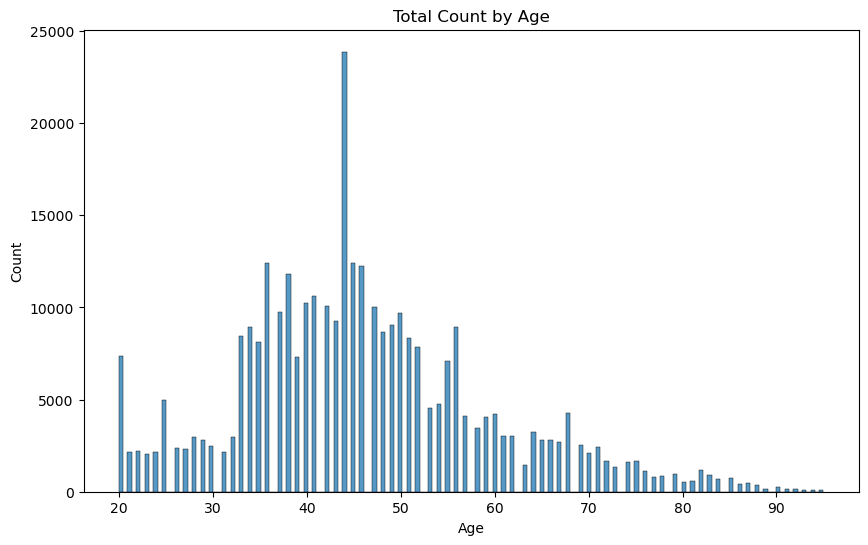

In [37]:
# Histogram by Age
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age')
plt.title('Total Count by Age')
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

#### Boxplot
A chart that visually shows the distribution of numerical data and skewness. Boxplots are a measure of how well distributed the data is in a dataset. They divide the data set into three quartiles and it represents the following points in a dataset:

Minimum score

First (lower) quartile

Median

Third (upper) quartile

Maximum score

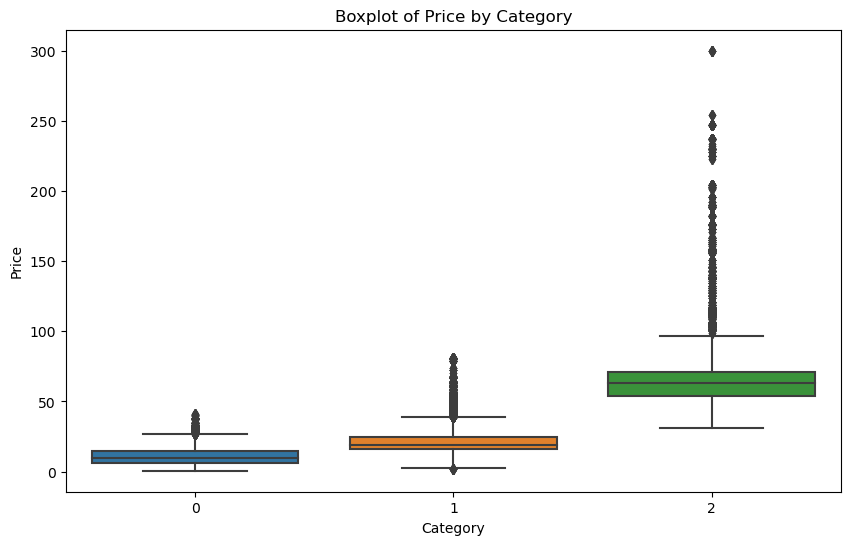

In [38]:
# Boxplot of Price by category
plt.figure(figsize=(10,6))
sns.boxplot(x="categ", y="price", data=df)
# Add title and labels
plt.title('Boxplot of Price by Category')
plt.xlabel('Category')
plt.ylabel('Price')
# Show plot
plt.show()

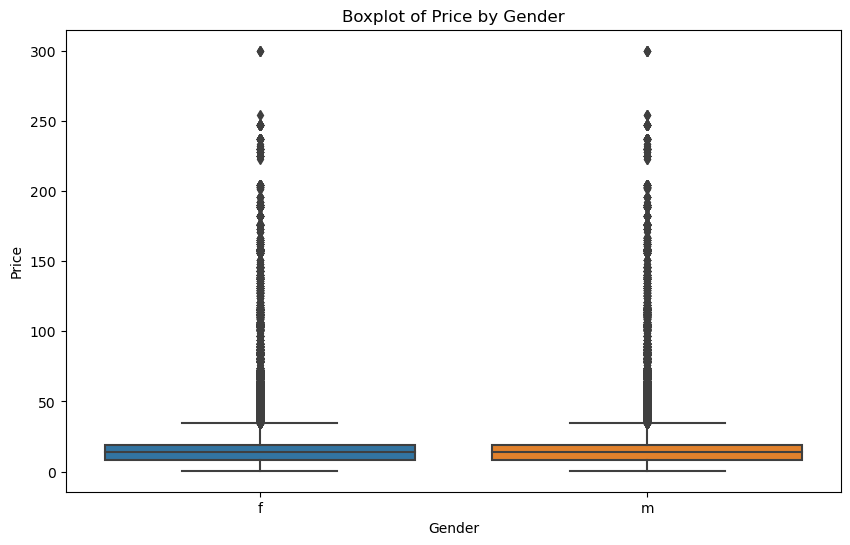

In [39]:
# Boxplot of Price by Gender
plt.figure(figsize=(10,6))
sns.boxplot(x="sex", y="price", data=df)
# Add title and labels
plt.title('Boxplot of Price by Gender')
plt.xlabel('Gender')
plt.ylabel('Price')
# Show plot
plt.show()

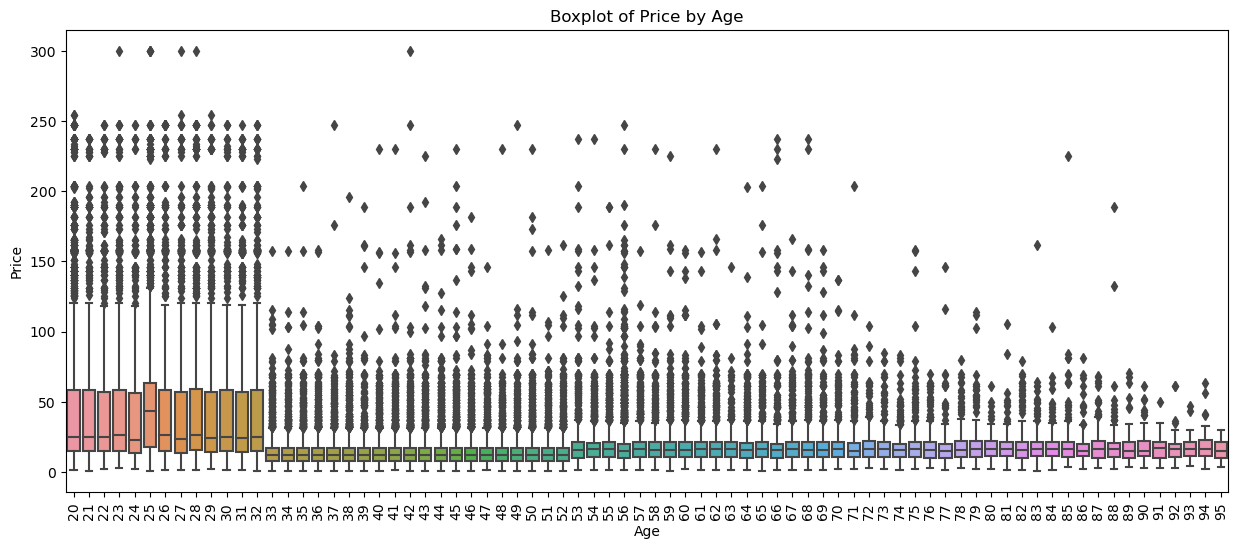

In [40]:
# Boxplot of Price by Age
plt.figure(figsize=(15,6))
sns.boxplot(x="age", y="price", data=df)
# Add title and labels
plt.title('Boxplot of Price by Age')
plt.xlabel('Age')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
# Show plot
plt.show()

### Time series graph

In [41]:
df.dtypes

id_prod        object
date           object
session_id     object
client_id      object
price         float64
categ           int64
sex            object
birth           int64
age             int64
dtype: object

In [42]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])
# Cluster dates into months
df['month'] = df['date'].dt.to_period('M')
# Group by month and aggregate values by price
monthly_data = df.groupby('month').agg({'price': 'sum'}).reset_index()
print(monthly_data)

      month      price
0   2021-03  479312.03
1   2021-04  472980.72
2   2021-05  489367.95
3   2021-06  481257.94
4   2021-07  480898.66
5   2021-08  479305.19
6   2021-09  502771.28
7   2021-10  319159.96
8   2021-11  512890.17
9   2021-12  522937.68
10  2022-01  522955.31
11  2022-02  532740.88


In [43]:
monthly_data.dtypes

month    period[M]
price      float64
dtype: object

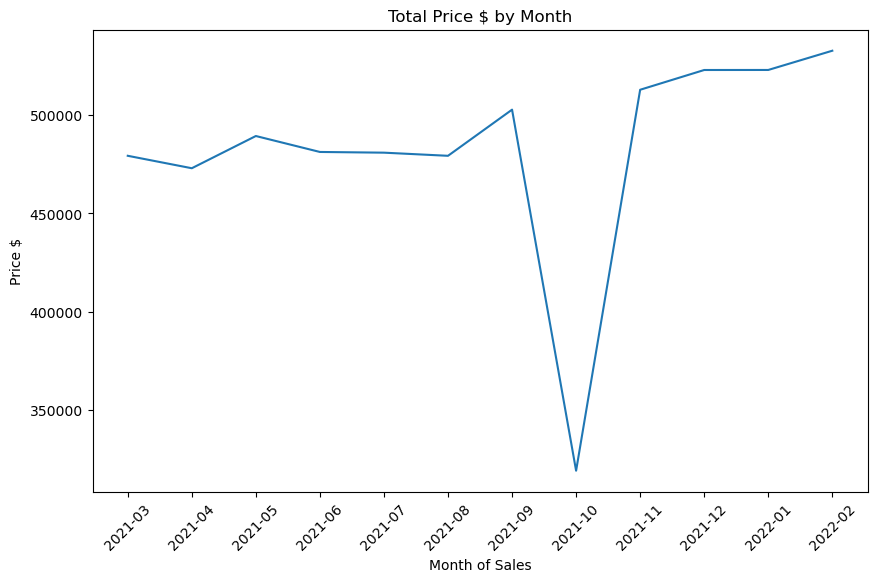

In [44]:
monthly_data['month'] = monthly_data['month'].astype(str)  # Convert the month to string for plotting
plt.figure(figsize=(10,6))
# Create a line plot
sns.lineplot(x='month', y='price', data=monthly_data)
# Add title and labels
plt.title('Total Price $ by Month')
plt.xlabel('Month of Sales')
plt.ylabel('Price $')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
# Show plot
plt.show()

### Bivariate analyses: Correlation analysis, Scatter plot, Regression

In [64]:
#### Correlation:

In [63]:
# Change sex column from character (f,m) to integer (1,2)
sex = 'sex'

# Define mapping dictionary
mapping = {'f': 1, 'm': 2}  # Replace with your mapping of character values to numerical values

# Replace column entries with numerical values
df[sex] = df[sex].map(mapping)

# Print the DataFrame to verify the changes
print(df.head()) 

  id_prod                       date session_id client_id  price  categ  sex  \
0  0_1483 2021-04-10 18:37:28.723910    s_18746    c_4450   4.99      0    1   
1  0_1085 2021-09-29 11:14:59.793823    s_97382    c_4450   3.99      0    1   
2  0_1453 2021-08-27 19:50:46.796939    s_81509    c_4450   7.99      0    1   
3  0_1405 2021-08-27 20:07:25.878440    s_81509    c_4450   4.99      0    1   
4  0_1392 2021-12-28 11:45:04.072281   s_141302    c_4450   6.30      0    1   

   birth  age    month  
0   1977   47  2021-04  
1   1977   47  2021-09  
2   1977   47  2021-08  
3   1977   47  2021-08  
4   1977   47  2021-12  


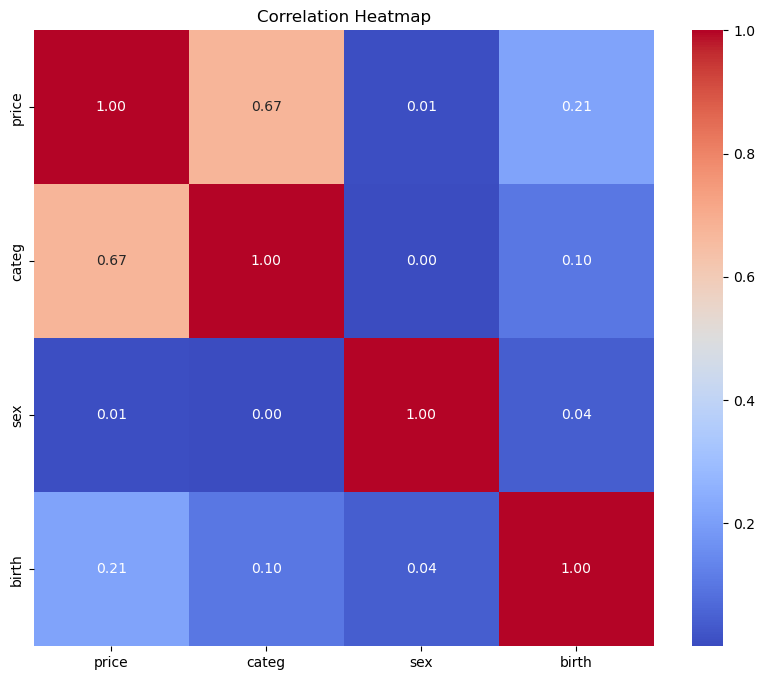

In [68]:
# Calculate correlation matrix
correlation_matrix = df[['price', 'categ', 'sex', 'birth']].corr()
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## From the correlation heat map the most correlated variables are Price and Category. Followed by Price and Birth Year. The least correlated variables are Category and Sex.

#### Scatter plot:

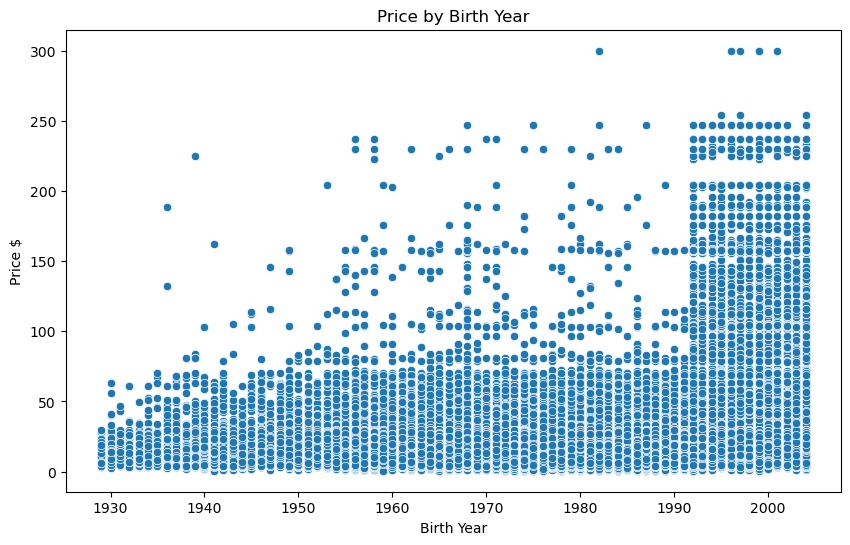

In [73]:
# Scatter plot Price vs birth year(X = Independent variable, Y = Dependent Variable)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="birth", y="price")
plt.title("Price by Birth Year")
plt.xlabel('Birth Year')
plt.ylabel('Price $')
plt.show()

#### Simple Linear Regression

C:\Users\vilma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

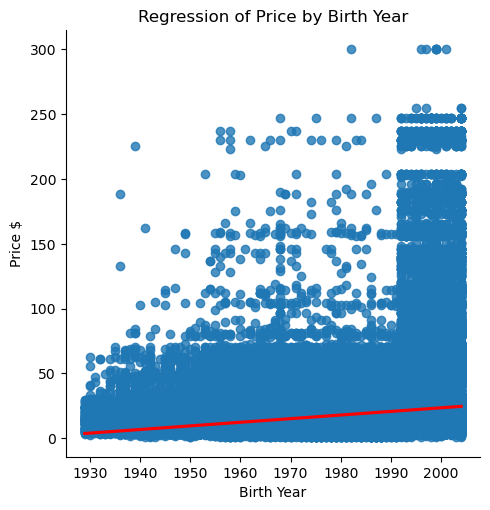

In [71]:
plt.figure(figsize=(10,6))
sns.lmplot(data=df, x="birth", y="price", line_kws={'color': 'red'})
plt.title("Regression of Price by Birth Year")
plt.xlabel('Birth Year')
plt.ylabel('Price $')
plt.show()

## Task 3

### 1. Is there a correlation between gender and categories of products purchased (two qualitative variables):
#### Null Hypothesis (H0): no relationsjip exists between the two variables (one variable does not affect the other) - Gender and Category are independent of each other.

In [186]:
# Contingency table of Gender and Category
contingency_table = pd.crosstab(df['sex'], df['categ'])
print("Frequency Distribution of Gender and Category:")
print(contingency_table)

Frequency Distribution of Gender and Category:
categ       0      1     2
sex                       
f      103786  55469  8260
m      105640  54266  9292


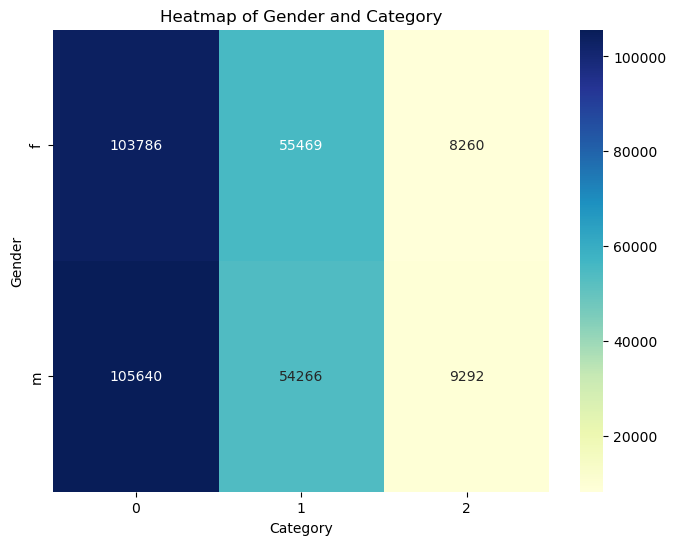

In [187]:
# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')  # 'd' for integer formatting
plt.title('Heatmap of Gender and Category')
plt.xlabel('Category')
plt.ylabel('Gender')
plt.show()

In [188]:
res = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", res.statistic)
print("P-value:", res.pvalue)

Chi-Square Statistic: 81.86933350990711
P-value: 1.6683997257127539e-18


In [189]:
Chi_Square = input("Chi-Square value:")
Chi_Square = int(Chi_Square)
if Chi_Square >= 1:
    print("A larger chi-square value indicates a greater discrepancy between the observed and expected frequencies, suggesting stronger evidence against the null hypothesis of independence, the null hypothesis is rejected. Therefore there is a correlation between gender and category. They depend on each other.")
elif Chi_Square >= 0 and account < 1:
    print("A smaller chi-square value indicates a evidence between the observed and expected frequencies, suggesting weak evidence against the null hypothesis of independence, the null hypothesis is accepted. Therefore there is no correlation between gender and category. They do not depend on each other.")
else:
    print("Revisit")

Chi-Square value:82
A larger chi-square value indicates a greater discrepancy between the observed and expected frequencies, suggesting stronger evidence against the null hypothesis of independence, the null hypothesis is rejected. Therefore there is a correlation between gender and category. They depend on each other.


### 2. Is there a correlation between Age (Independent) and total amount purchased (Dependent) (Qualitative and Quantitative Variable):

In [160]:
df['age'] = current_year - df['birth']
print(df)

       id_prod                        date session_id client_id  price  categ  \
0       0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450   4.99      0   
1       0_1085  2021-09-29 11:14:59.793823    s_97382    c_4450   3.99      0   
2       0_1453  2021-08-27 19:50:46.796939    s_81509    c_4450   7.99      0   
3       0_1405  2021-08-27 20:07:25.878440    s_81509    c_4450   4.99      0   
4       0_1392  2021-12-28 11:45:04.072281   s_141302    c_4450   6.30      0   
...        ...                         ...        ...       ...    ...    ...   
336708   1_607  2021-09-25 07:26:00.224331    s_95185    c_4786  26.99      1   
336709   1_673  2021-06-01 00:49:49.781631    s_42350    c_2793  12.99      1   
336710  0_2075  2021-10-09 09:03:48.268536   s_102200    c_2793   8.99      0   
336711  0_1692  2021-09-15 19:42:08.596375    s_90430    c_4478  13.36      0   
336712   0_142  2021-09-25 18:07:25.880052    s_95415    c_1232  19.85      0   

       sex  birth  age  
0 

In [161]:
# Group by age and aggregate total price $
age_data = df.groupby(['age']).agg({'price': 'sum'}).reset_index()
age_data = age_data.rename(columns={'price': 'total_amount'})
print(age_data)

    age  total_amount
0    20     295387.98
1    21      88461.39
2    22      89910.02
3    23      84881.48
4    24      80099.92
..  ...           ...
71   91       2632.02
72   92       2586.09
73   93       1432.92
74   94       2028.35
75   95       1300.03

[76 rows x 2 columns]


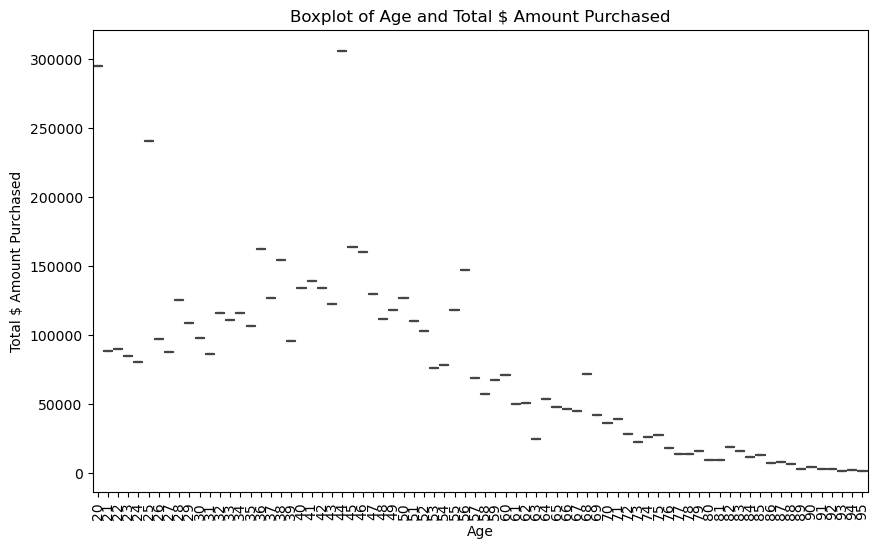

In [162]:
# Boxplot of Age and Total $ Amount
plt.figure(figsize=(10,6))
sns.boxplot(x="age", y="total_amount", data=age_data)
# Add title and labels
plt.title('Boxplot of Age and Total $ Amount Purchased')
plt.xlabel('Age')
plt.ylabel('Total $ Amount Purchased')
plt.xticks(rotation=90) 
# Show plot
plt.show()

In [163]:
overall_mean = age_data['total_amount'].mean()
# Calculate sum of squares total (SS_total)
ss_total = ((age_data['total_amount'] - overall_mean) ** 2).sum()
# Calculate sum of squares between (SS_between)
group_means = age_data.groupby('age')['total_amount'].mean()
ss_between = ((group_means - overall_mean) ** 2).sum() * len(age_data['total_amount'])
# Calculate sum of squares within (SS_within)
ss_within = ss_total - ss_between
# Calculate Eta-squared (η²)
eta_squared = ss_between / ss_total
print("Eta-squared (η²):", eta_squared)

Eta-squared (η²): 76.0


In [164]:
Eta_squared = input("ta-squared (η²) value:")
Eta_squared = int(Eta_squared)
if Eta_squared >= 1:
    print("Eta-squared (η²) is large which indicates a strong meaningful relationship between Age and Total $ Amount Purchased. Age has a notable influence on the Total $ Amount Purchased.")
elif Eta_squared >= 0 and account < 1:
    print("Eta-squared (η²) is small which indicates a weak relationship between Age and Total $ Amount Purchased. Age does not have an influence on the Total $ Amount Purchased.")
else:
    print("Revisit")

ta-squared (η²) value:76
Eta-squared (η²) is large which indicates a strong meaningful relationship between Age and Total $ Amount Purchased. Age has a notable influence on the Total $ Amount Purchased.


### 3. Is there a correlation between age and the purchase frequency (the number of purchases per month for example):

In [46]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])
# Cluster dates into months
df['month'] = df['date'].dt.to_period('M')
# Group by month and aggregate values by price
monthly_data = df.groupby(['month','age']).agg({'price': 'count'}).reset_index()
monthly_data = monthly_data.rename(columns={'price': 'purchase_count'})
print(monthly_data)

       month  age  purchase_count
0    2021-03   20             596
1    2021-03   21             207
2    2021-03   22             136
3    2021-03   23             170
4    2021-03   24             187
..       ...  ...             ...
907  2022-02   91              29
908  2022-02   92              15
909  2022-02   93               9
910  2022-02   94              13
911  2022-02   95              11

[912 rows x 3 columns]


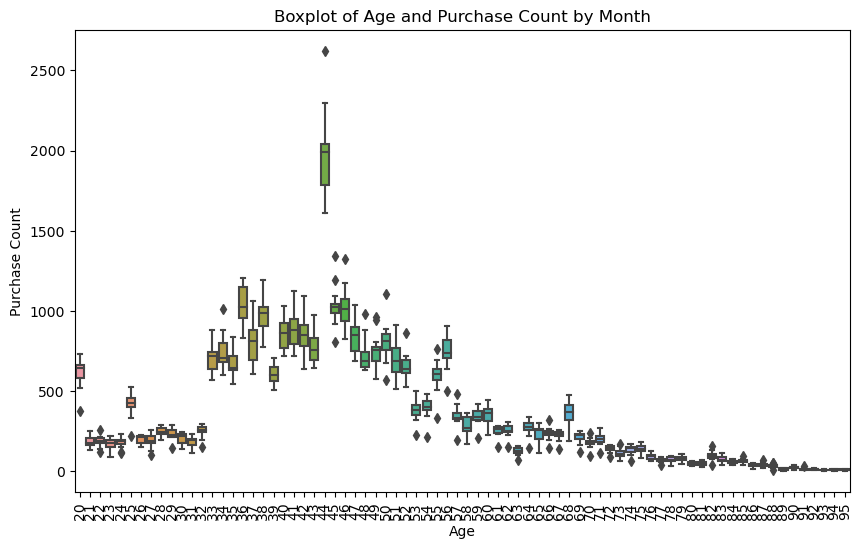

In [47]:
# Boxplot of Age and Purchase Count
plt.figure(figsize=(10,6))
sns.boxplot(x="age", y="purchase_count", data=monthly_data)
# Add title and labels
plt.title('Boxplot of Age and Purchase Count by Month')
plt.xlabel('Age')
plt.ylabel('Purchase Count')
plt.xticks(rotation=90) 
# Show plot
plt.show()

In [48]:
overall_mean = monthly_data['purchase_count'].mean()
# Calculate sum of squares total (SS_total)
ss_total = ((monthly_data['purchase_count'] - overall_mean) ** 2).sum()
# Calculate sum of squares between (SS_between)
group_means = monthly_data.groupby('age')['purchase_count'].mean()
ss_between = ((group_means - overall_mean) ** 2).sum() * len(monthly_data['purchase_count'])
# Calculate sum of squares within (SS_within)
ss_within = ss_total - ss_between
# Calculate Eta-squared (η²)
eta_squared = ss_between / ss_total
print("Eta-squared (η²):", eta_squared)

Eta-squared (η²): 73.16680694828045


In [50]:
Eta_squared = input("ta-squared (η²) value:")
Eta_squared = int(Eta_squared)
if Eta_squared >= 1:
    print("Eta-squared (η²) is large which indicates a strong meaningful relationship between Age and the number of purchases per month. Age has a notable influence on the number of purchases per month.")
elif Eta_squared >= 0 and Eta_squared < 1:
    print("Eta-squared (η²) is small which indicates a weak relationship between Age and the number of purchases per month. Age does not have an influence on the number of purchases per month.")
else:
    print("Revisit")

ta-squared (η²) value:73
Eta-squared (η²) is large which indicates a strong meaningful relationship between Age and the number of purchases per month. Age has a notable influence on the number of purchases per month.


### 4. Is there a correlation between age and the average basket size (in number of items):

In [58]:
df = d1.merge(customers, left_on = 'client_id', right_on ='client_id')
print(df)

       id_prod                        date session_id client_id  price  categ  \
0       0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450   4.99      0   
1       0_1085  2021-09-29 11:14:59.793823    s_97382    c_4450   3.99      0   
2       0_1453  2021-08-27 19:50:46.796939    s_81509    c_4450   7.99      0   
3       0_1405  2021-08-27 20:07:25.878440    s_81509    c_4450   4.99      0   
4       0_1392  2021-12-28 11:45:04.072281   s_141302    c_4450   6.30      0   
...        ...                         ...        ...       ...    ...    ...   
336708   1_607  2021-09-25 07:26:00.224331    s_95185    c_4786  26.99      1   
336709   1_673  2021-06-01 00:49:49.781631    s_42350    c_2793  12.99      1   
336710  0_2075  2021-10-09 09:03:48.268536   s_102200    c_2793   8.99      0   
336711  0_1692  2021-09-15 19:42:08.596375    s_90430    c_4478  13.36      0   
336712   0_142  2021-09-25 18:07:25.880052    s_95415    c_1232  19.85      0   

       sex  birth  
0      

In [59]:
current_year = datetime.now().year
df['age'] = current_year - df['birth']
# Convert the 'date' column to Day
df['date'] = pd.to_datetime(df['date'])
# Cluster dates into days
df['day'] = df['date'].dt.to_period('D')
print(df)

       id_prod                       date session_id client_id  price  categ  \
0       0_1483 2021-04-10 18:37:28.723910    s_18746    c_4450   4.99      0   
1       0_1085 2021-09-29 11:14:59.793823    s_97382    c_4450   3.99      0   
2       0_1453 2021-08-27 19:50:46.796939    s_81509    c_4450   7.99      0   
3       0_1405 2021-08-27 20:07:25.878440    s_81509    c_4450   4.99      0   
4       0_1392 2021-12-28 11:45:04.072281   s_141302    c_4450   6.30      0   
...        ...                        ...        ...       ...    ...    ...   
336708   1_607 2021-09-25 07:26:00.224331    s_95185    c_4786  26.99      1   
336709   1_673 2021-06-01 00:49:49.781631    s_42350    c_2793  12.99      1   
336710  0_2075 2021-10-09 09:03:48.268536   s_102200    c_2793   8.99      0   
336711  0_1692 2021-09-15 19:42:08.596375    s_90430    c_4478  13.36      0   
336712   0_142 2021-09-25 18:07:25.880052    s_95415    c_1232  19.85      0   

       sex  birth  age         day  
0 

In [62]:
# Group by month and aggregate values by basket size
basket_size = df.groupby(['day','age','sex','client_id','session_id']).agg({'price': 'count'}).reset_index()
basket_size = df.rename(columns={'price': 'basket_size'})
print(basket_size)

       id_prod                       date session_id client_id  basket_size  \
0       0_1483 2021-04-10 18:37:28.723910    s_18746    c_4450         4.99   
1       0_1085 2021-09-29 11:14:59.793823    s_97382    c_4450         3.99   
2       0_1453 2021-08-27 19:50:46.796939    s_81509    c_4450         7.99   
3       0_1405 2021-08-27 20:07:25.878440    s_81509    c_4450         4.99   
4       0_1392 2021-12-28 11:45:04.072281   s_141302    c_4450         6.30   
...        ...                        ...        ...       ...          ...   
336708   1_607 2021-09-25 07:26:00.224331    s_95185    c_4786        26.99   
336709   1_673 2021-06-01 00:49:49.781631    s_42350    c_2793        12.99   
336710  0_2075 2021-10-09 09:03:48.268536   s_102200    c_2793         8.99   
336711  0_1692 2021-09-15 19:42:08.596375    s_90430    c_4478        13.36   
336712   0_142 2021-09-25 18:07:25.880052    s_95415    c_1232        19.85   

        categ sex  birth  age         day  
0      

In [61]:
print(basket_size)

       id_prod                       date session_id client_id  basket_size  \
0       0_1483 2021-04-10 18:37:28.723910    s_18746    c_4450         4.99   
1       0_1085 2021-09-29 11:14:59.793823    s_97382    c_4450         3.99   
2       0_1453 2021-08-27 19:50:46.796939    s_81509    c_4450         7.99   
3       0_1405 2021-08-27 20:07:25.878440    s_81509    c_4450         4.99   
4       0_1392 2021-12-28 11:45:04.072281   s_141302    c_4450         6.30   
...        ...                        ...        ...       ...          ...   
336708   1_607 2021-09-25 07:26:00.224331    s_95185    c_4786        26.99   
336709   1_673 2021-06-01 00:49:49.781631    s_42350    c_2793        12.99   
336710  0_2075 2021-10-09 09:03:48.268536   s_102200    c_2793         8.99   
336711  0_1692 2021-09-15 19:42:08.596375    s_90430    c_4478        13.36   
336712   0_142 2021-09-25 18:07:25.880052    s_95415    c_1232        19.85   

        categ sex  birth  age         day  
0      

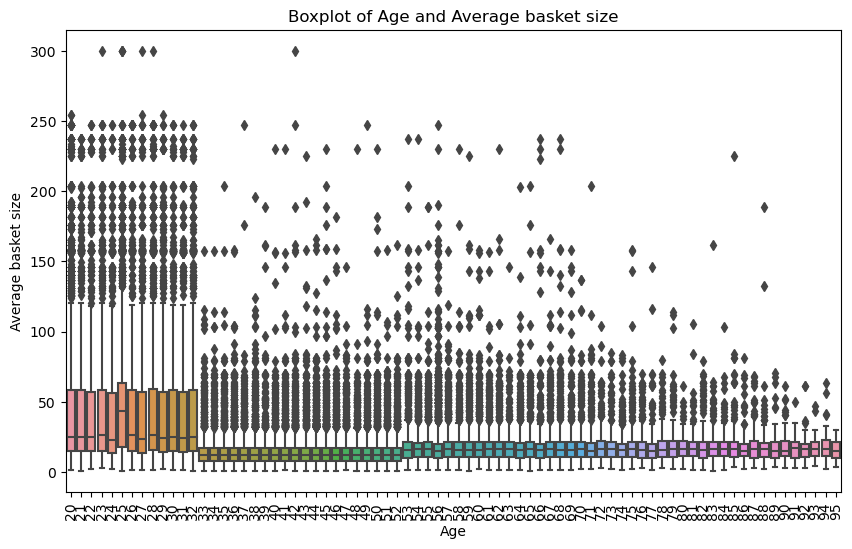

In [63]:
# Boxplot of Age and Average basket size
plt.figure(figsize=(10,6))
sns.boxplot(x="age", y="basket_size", data=basket_size)
# Add title and labels
plt.title('Boxplot of Age and Average basket size')
plt.xlabel('Age')
plt.ylabel('Average basket size')
plt.xticks(rotation=90) 
# Show plot
plt.show()

In [64]:
overall_mean = basket_size['basket_size'].mean()
# Calculate sum of squares total (SS_total)
ss_total = ((basket_size['basket_size'] - overall_mean) ** 2).sum()
# Calculate sum of squares between (SS_between)
group_means = basket_size.groupby('age')['basket_size'].mean()
ss_between = ((group_means - overall_mean) ** 2).sum() * len(basket_size['basket_size'])
# Calculate sum of squares within (SS_within)
ss_within = ss_total - ss_between
# Calculate Eta-squared (η²)
eta_squared = ss_between / ss_total
print("Eta-squared (η²):", eta_squared)

Eta-squared (η²): 23.72099484292388


In [65]:
Eta_squared = input("ta-squared (η²) value:")
Eta_squared = int(Eta_squared)
if Eta_squared >= 1:
    print("Eta-squared (η²) is large which indicates a strong meaningful relationship between Age and Total $ Amount Purchased. Age has a notable influence on the Total $ Amount Purchased.")
elif Eta_squared >= 0 and Eta_squared < 1:
    print("Eta-squared (η²) is small which indicates a weak relationship between Age and Total $ Amount Purchased. Age does not have an influence on the Total $ Amount Purchased.")
else:
    print("Revisit")

ta-squared (η²) value:24
Eta-squared (η²) is large which indicates a strong meaningful relationship between Age and Total $ Amount Purchased. Age has a notable influence on the Total $ Amount Purchased.


### 5. Is there a correlation between age and categories of purchased products (two qualitative variables)::
#### Null Hypothesis: there is no association between the two categorical variables - Gender and Category are independent of each other.

In [53]:
# Contingency table of Age and Category
contingency_table1 = pd.crosstab(df['age'], df['categ'])
print("Frequency Distribution of Age and Category:")
print(contingency_table1)

Frequency Distribution of Age and Category:
categ     0     1     2
age                    
20     1668  2759  2921
21      488   817   877
22      497   830   896
23      461   732   839
24      586   791   797
..      ...   ...   ...
91       70    92     1
92       73    85     1
93       36    47     1
94       43    71     1
95       35    51     0

[76 rows x 3 columns]


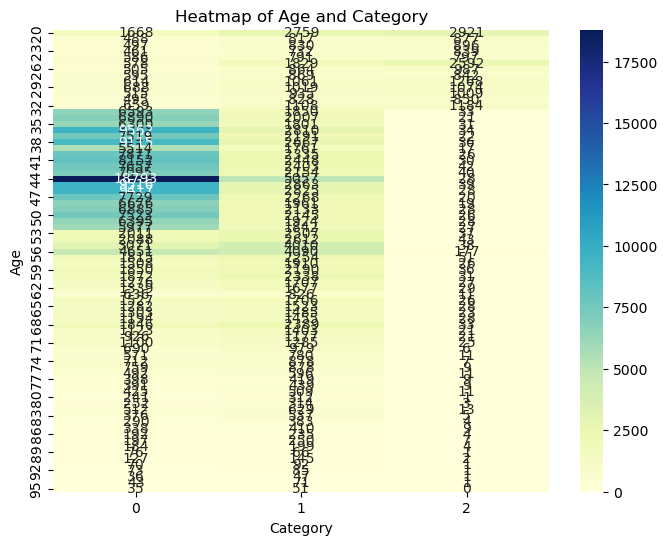

In [54]:
# Heatmap of Age and Category
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table1, annot=True, cmap='YlGnBu', fmt='d')  # 'd' for integer formatting
plt.title('Heatmap of Age and Category')
plt.xlabel('Category')
plt.ylabel('Age')
plt.show()

In [55]:
from scipy.stats import chi2_contingency
# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table1)

# Output results
print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)

Chi-Square Statistic: 153915.5289559564
P-value: 0.0


In [57]:
Chi_Square = input("Chi-Square value:")
Chi_Square = int(Chi_Square)
if Chi_Square >= 1:
    print("A larger chi-square value indicates a greater discrepancy between the observed and expected frequencies, suggesting stronger evidence against the null hypothesis of independence, the null hypothesis is rejected. Therefore there is a correlation between gender and category. They depend on each other.")
elif Chi_Square >= 0 and Chi_Square < 1:
    print("A smaller chi-square value indicates a evidence between the observed and expected frequencies, suggesting weak evidence against the null hypothesis of independence, the null hypothesis is accepted. Therefore there is no correlation between gender and category. They do not depend on each other.")
else:
    print("Revisit")

Chi-Square value:0
A smaller chi-square value indicates a evidence between the observed and expected frequencies, suggesting weak evidence against the null hypothesis of independence, the null hypothesis is accepted. Therefore there is no correlation between gender and category. They do not depend on each other.


## EXTRA TEST NOTES/ No need to evaluate

In [229]:
# filter values
selected_rows = df[df['client_id'] == 'c_4450']
df = df.sort_values(by=['session_id'])
print(selected_rows)

   id_prod                       date session_id client_id  price  categ sex  \
27   1_407 2021-03-01 20:28:51.627328      s_425    c_4450  15.99      1   f   
53  0_1417 2021-03-01 20:33:43.396015      s_425    c_4450  17.99      0   f   
76  0_1344 2021-03-01 20:34:27.459794      s_425    c_4450  19.04      0   f   
5   0_1034 2021-03-08 05:10:34.248291     s_3329    c_4450  14.38      0   f   
28  0_1440 2021-03-11 23:57:59.896984     s_5059    c_4450   5.62      0   f   
..     ...                        ...        ...       ...    ...    ...  ..   
7   0_1152 2022-02-06 22:01:12.551635   s_161061    c_4450  10.70      0   f   
66  0_2135 2022-02-06 22:03:05.045193   s_161061    c_4450   4.99      0   f   
41  0_1407 2022-02-06 22:10:19.221790   s_161061    c_4450  13.99      0   f   
56  0_1325 2022-02-09 22:29:34.749164   s_162645    c_4450   9.99      0   f   
29  0_2062 2022-02-09 22:33:24.579895   s_162645    c_4450  16.01      0   f   

    birth  age         day  
27   1977 

C:\Users\vilma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x600 with 0 Axes>

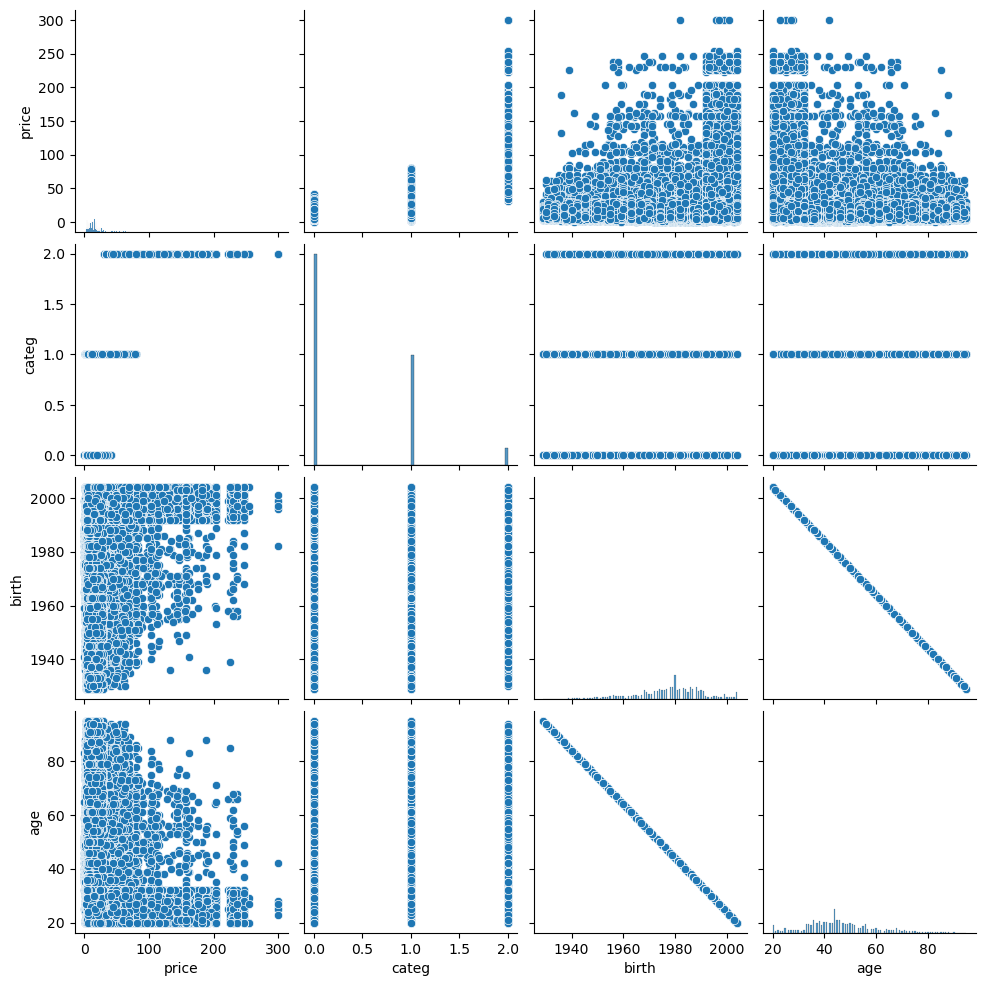

In [66]:
# Pairplot using seaborn to understand correlation of variables
plt.figure(figsize=(15,6))
sns.pairplot(df)
plt.show()

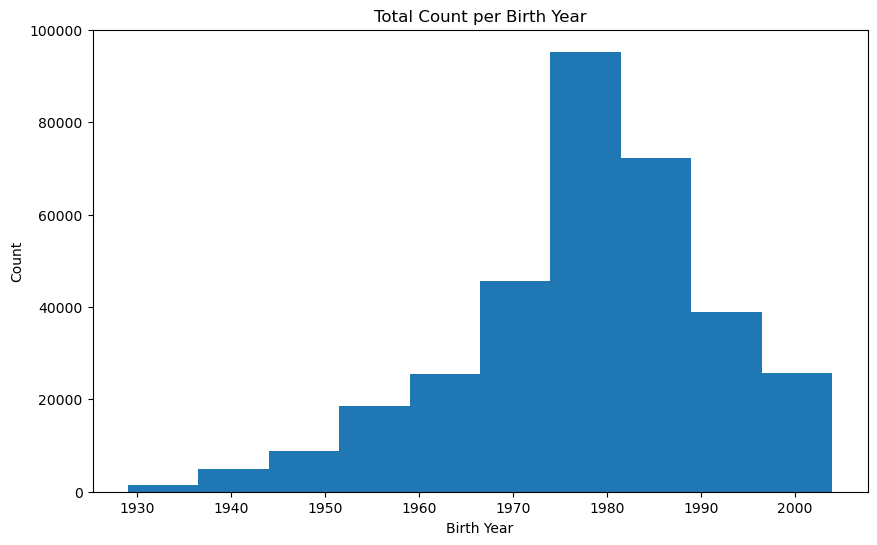

In [186]:
# creating a Histogram by birth
plt.figure(figsize=(10,6))
plt.hist(df['birth'])
plt.title('Total Count per Birth Year')
plt.xlabel("Birth Year")
plt.ylabel("Count")
plt.show()

In [239]:
# Compute the correlation between age and price
correlation = df['price'].corr(df['birth'])

print("Correlation between age and price:", correlation)

Correlation between age and price: 0.21152926170471376


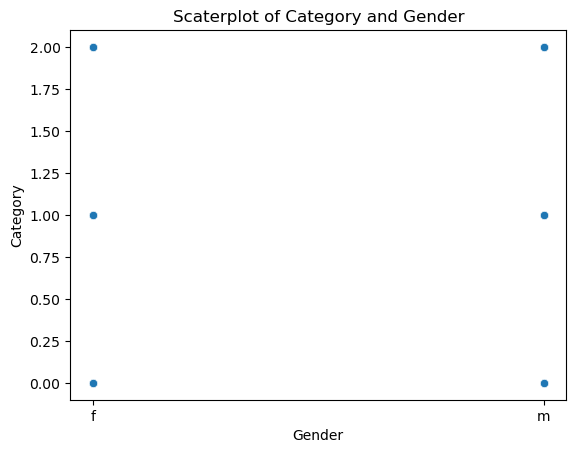

In [202]:
# Create scatter plot
sns.scatterplot(x=df['sex'], y=df['categ'])
plt.title("Scaterplot of Category and Gender")
plt.xlabel('Gender')
plt.ylabel('Category')
plt.show()

In [208]:
import numpy as np
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

In [209]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])

In [210]:
pearson_corr, p_value = pearsonr(df['sex'], df['categ'])
print("Pearson correlation coefficient between gender and category:", pearson_corr)
print("P-value:", p_value)

Pearson correlation coefficient between gender and category: 0.0006886069122626212
P-value: 0.6894685895193359


#### Pearon coeficient is pozitive but close to 0 which means there is a weak correlation between Gender and Category. There is no strong sugestions that the variables will increase together

#### P-value: The hypothesis is that there is no a correlation between gender and category. A large P-value means that the null hypothesis is accepted meaning that there is not a strong correlation between Gender and Category.

In [ ]:
?????????????

In [ ]:
?????????????

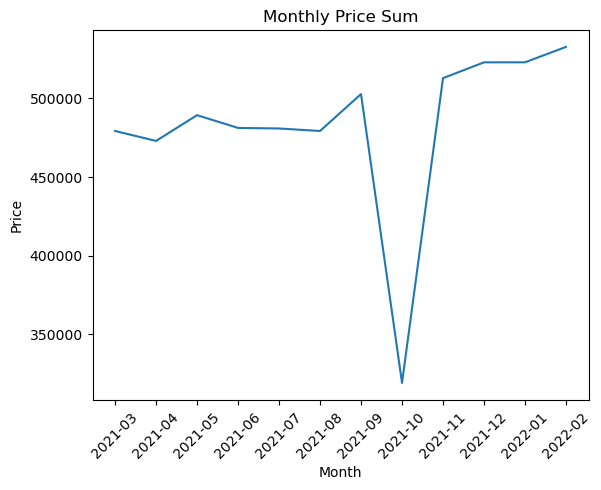

In [70]:
monthly_data['month'] = monthly_data['month'].astype(str)  # Convert the month to string for plotting
plt.plot(monthly_data['month'], monthly_data['price'])  # Plot the 'price' column
plt.title('Monthly Price Sum')  # Set the title of the plot
plt.xlabel('Month')  # Set the label for the x-axis
plt.ylabel('Price')  # Set the label for the y-axis
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()  # Display the plot

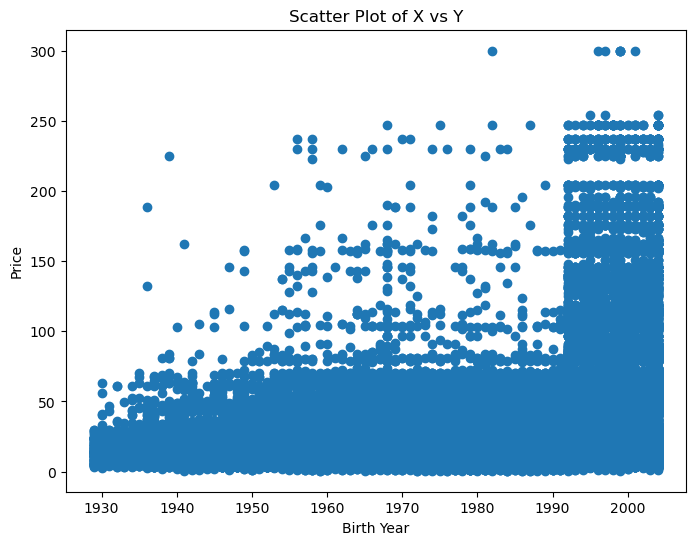

In [58]:
# Scatter plot Price vs birth year(X = Independent variable, Y = Dependent Variable)
plt.figure(figsize=(8, 6))
plt.scatter(df['birth'], df['price'])
plt.title('Scatter Plot of X vs Y')
plt.xlabel('Birth Year')
plt.ylabel('Price')
##plt.grid(True)
plt.show()